# Explore

## Import Libraries

In [2]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

#Libraries for processing data
import pandas as pd
import numpy as np

#Import libraries for graphing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Libraries for obtaining data from SQL databse
import env
import os

#Library for statistical testing
from scipy import stats

##Acquire function
from wrangle_zillow import wrangle_zillow
from wrangle_zillow import split_data

#Train, test, split
from sklearn.model_selection import train_test_split

#Library for dealing with NA values
from sklearn.impute import SimpleImputer

#Library needed for scaling the data
import sklearn.preprocessing

## Import Zillow Dataset

In [3]:
df = wrangle_zillow()

In [4]:
df.head()

,propertylandusetypeid,id,heatingorsystemtypeid,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate,last_trans_date,propertylandusedesc
10,269.0,10,2.0,11070347,4.0,4.0,1.0,4.0,3095.0,3095.0,...,192544.0,2016.0,53784.0,2460.72,NaN,Central,0.005963,2017-01-02,2017-01-02,Planned Unit Development
20,261.0,20,2.0,11324547,2.0,4.0,8.0,2.0,3633.0,3633.0,...,296425.0,2016.0,74104.0,6941.39,NaN,Central,0.042463,2017-01-02,2017-01-02,Single Family Residential
30,266.0,30,2.0,11524947,2.0,2.0,7.0,2.0,1090.0,1090.0,...,357568.0,2016.0,124671.0,6165.36,NaN,Central,0.021853,2017-01-02,2017-01-02,Condominium
31,261.0,31,2.0,11544747,4.0,3.0,11.0,4.0,1620.0,1620.0,...,847770.0,2016.0,508238.0,10244.94,NaN,Central,-0.019546,2017-01-02,2017-01-02,Single Family Residential
33,261.0,33,2.0,11585547,2.0,3.0,8.0,2.0,2077.0,2077.0,...,646760.0,2016.0,436568.0,7924.68,NaN,Central,-0.040807,2017-01-02,2017-01-02,Single Family Residential


In [5]:
#Now we will replace the null values with the mean value of each column
def impute_null_values(df):
    '''
    We will use SimpleImputer to impute the mean value into the null values into each column.
    '''
    #We will use the mean imputer function.
    imputer = SimpleImputer(strategy='most_frequent')

    #We will create a for loop that will impute all the null values in each one of our columns.
    for col in df.columns:
        df[[col]] = imputer.fit_transform(df[[col]])
    
    return df

In [6]:
df = impute_null_values(df)

In [7]:
train, validate, test = split_data(df)

In [7]:
train.head()

,propertylandusetypeid,id,heatingorsystemtypeid,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate,last_trans_date,propertylandusedesc
2462,261.0,2462,2.0,11020724,2.0,3.0,6.0,2.0,1406.0,1406.0,...,460200.0,2016.0,360400.0,5727.60,6.037110e+13,Central,-0.009313,2017-01-12,2017-01-12,Single Family Residential
74293,261.0,74293,2.0,11089877,2.0,4.0,6.0,2.0,1665.0,1665.0,...,252423.0,2016.0,94356.0,3163.81,6.037113e+13,Central,0.109348,2017-09-07,2017-09-07,Single Family Residential
47347,261.0,47347,2.0,11075321,3.0,4.0,8.0,3.0,2365.0,2365.0,...,355893.0,2016.0,173410.0,4548.83,6.037111e+13,Central,0.006360,2017-06-16,2017-06-16,Single Family Residential
32586,261.0,32586,2.0,11088659,2.0,3.0,6.0,2.0,1348.0,1348.0,...,267039.0,2016.0,134526.0,3412.71,6.037113e+13,Central,0.011047,2017-05-03,2017-05-03,Single Family Residential
51749,261.0,51749,7.0,12342656,1.0,3.0,4.0,1.0,1062.0,1062.0,...,235767.0,2016.0,167237.0,2988.15,6.037554e+13,Floor/Wall,0.021502,2017-06-29,2017-06-29,Single Family Residential


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39175 entries, 2462 to 18266
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         39175 non-null  float64
 1   id                            39175 non-null  float64
 2   heatingorsystemtypeid         39175 non-null  float64
 3   parcelid                      39175 non-null  float64
 4   bathroomcnt                   39175 non-null  float64
 5   bedroomcnt                    39175 non-null  float64
 6   buildingqualitytypeid         39175 non-null  float64
 7   calculatedbathnbr             39175 non-null  float64
 8   calculatedfinishedsquarefeet  39175 non-null  float64
 9   finishedsquarefeet12          39175 non-null  float64
 10  fips                          39175 non-null  float64
 11  fullbathcnt                   39175 non-null  float64
 12  latitude                      39175 non-null  float64
 13

## Does the logerror of a property differ by county?

### Graphs

In [7]:
sns.set_palette("bright")

#### Value Counts

In [10]:
train.fips.value_counts()

6037.0    26042
6059.0     9903
6111.0     3230
Name: fips, dtype: int64

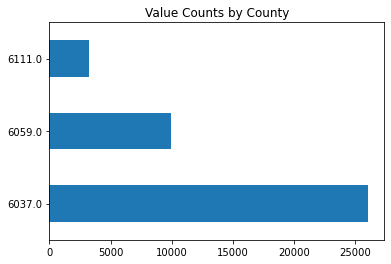

In [16]:
value_counts_county = train.fips.value_counts().plot.barh(title = "Value Counts by County")

#### LogError by County

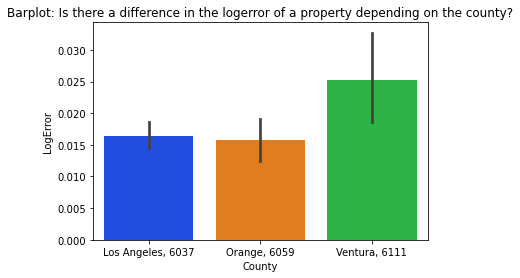

In [64]:
county_log_error = sns.barplot(data = train, y = 'logerror', x = 'fips')
title = plt.title("Barplot: Is there a difference in the logerror of a property depending on the county?")
xlabel = plt.xlabel("County")
ylabel = plt.ylabel("LogError")
xticks = county_log_error.set_xticklabels(["Los Angeles, 6037", "Orange, 6059", "Ventura, 6111"])

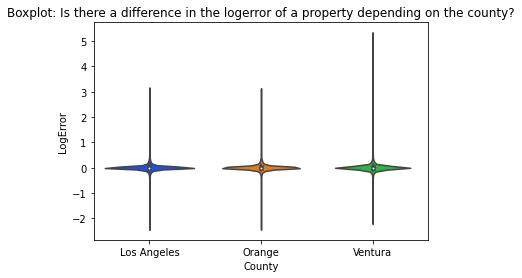

In [65]:
county_log_error = sns.violinplot(data = train, y = 'logerror', x = 'fips')
title = plt.title("Boxplot: Is there a difference in the logerror of a property depending on the county?")
xlabel = plt.xlabel("County")
ylabel = plt.ylabel("LogError")
xticks = county_log_error.set_xticklabels(["Los Angeles", "Orange", "Ventura"])

### Statistical Testing

#### Leven's Test

$H_0$: There is no difference in log error variance between Los Angeles and Orange County. 

$H_a$: There is a significant different in log error variance between Los Angeles and Orange County.

In [66]:
stats.levene(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6059.0').logerror,
)

LeveneResult(statistic=0.2922519988069781, pvalue=0.5887843475165777)

Because of a high p-value, we fail to reject the null hypothesis.

$H_0$: There is no difference in log error variance between Los Angeles and Ventura County. 

$H_a$: There is a significant different in log error variance between Los Angeles and Ventura County.

In [67]:
stats.levene(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6111.0').logerror,
)

LeveneResult(statistic=0.811996093595627, pvalue=0.3675381765653868)

Because of a high p-value, we fail to reject the null hypothesis.

$H_0$: There is no difference in log error variance between Orange and Ventura County. 

$H_a$: There is a significant different in log error variance between Orange and Ventura County.

In [68]:
stats.levene(
    train.query('fips == 6059.0').logerror,
    train.query('fips == 6111.0').logerror,
)

LeveneResult(statistic=0.26029144489707706, pvalue=0.6099285743995952)

Because of a high p-value, we fail to reject the null hypothesis that variance in log error is significantly different between Los Angeles, Orange County, and Ventura.

#### T test

$H_0$: There is no difference in log error for Orange and Ventura County. 

$H_a$: There is a significant different in log error for Orange and Ventura County.

In [69]:
stats.ttest_ind(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6059.0').logerror,
    equal_var = True
)

Ttest_indResult(statistic=0.3744968199332362, pvalue=0.7080369314010183)

$H_0$: There is no difference in log error for Los Angeles and Ventura County. 

$H_a$: There is a significant different in log error for Los Angeles and Ventura County.

In [70]:
stats.ttest_ind(
    train.query('fips == 6037.0').logerror,
    train.query('fips == 6111.0').logerror,
    equal_var = True
)

Ttest_indResult(statistic=-2.7295762208762, pvalue=0.006345368610063448)

$H_0$: There is no difference in log error for Orange and Los Angeles County. 

$H_a$: There is a significant different in log error for Orange and Los Angeles County.

In [71]:
stats.ttest_ind(
    train.query('fips == 6111.0').logerror,
    train.query('fips == 6059.0').logerror,
    equal_var = True
)

Ttest_indResult(statistic=2.658837258745088, pvalue=0.007850591636554086)

We conclude that there is no significant difference for logerror between homes in Los Angles and Orange County. 

However, Orange and Los Angeles County both have significantly different log error from Ventura County.

## Is there a relationship between Tax Amount and logerror?

### Graphs

#### Scatterplot

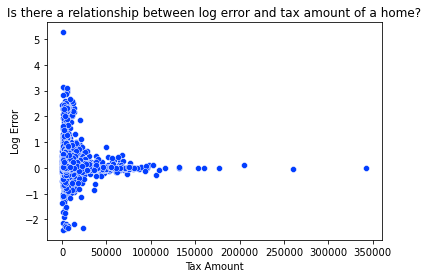

In [78]:
taxvalue_scatterplot = sns.scatterplot(data = train, 
                                      x = "taxamount", 
                                      y = "logerror")
set_labels = taxvalue_scatterplot.set(xlabel='Tax Amount', ylabel = "Log Error", Title = "Is there a relationship between log error and tax amount of a home?")


### Statistical Testing

$H_0$: There is no correlation between tax amount and log error.

$H_a$: There is a correlation between tax amount and log error.

In [79]:
test_results = stats.pearsonr(train.taxamount, train.logerror)
test_results

(0.001560409664754406, 0.7574454055872194)

Because our pvalue is high, we conclude there is no direct correlation between taxvalue of a home and log error.

## Does the relationship between tax amount and log error change at a certain threshold of tax amount?

### Bin Tax Amount Values

In [110]:
train['tax_amount_bin'] = pd.cut(train.taxamount, [0, 5000, 350000])

In [111]:
train.head()

,propertylandusetypeid,id,heatingorsystemtypeid,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,logerror,transactiondate,last_trans_date,propertylandusedesc,tax_amount_bin
2462,261.0,2462.0,2.0,11020724.0,2.0,3.0,6.0,2.0,1406.0,1406.0,...,2016.0,360400.0,5727.60,6.037110e+13,Central,-0.009313,2017-01-12,2017-01-12,Single Family Residential,"(5000, 350000]"
74293,261.0,74293.0,2.0,11089877.0,2.0,4.0,6.0,2.0,1665.0,1665.0,...,2016.0,94356.0,3163.81,6.037113e+13,Central,0.109348,2017-09-07,2017-09-07,Single Family Residential,"(0, 5000]"
47347,261.0,47347.0,2.0,11075321.0,3.0,4.0,8.0,3.0,2365.0,2365.0,...,2016.0,173410.0,4548.83,6.037111e+13,Central,0.006360,2017-06-16,2017-06-16,Single Family Residential,"(0, 5000]"
32586,261.0,32586.0,2.0,11088659.0,2.0,3.0,6.0,2.0,1348.0,1348.0,...,2016.0,134526.0,3412.71,6.037113e+13,Central,0.011047,2017-05-03,2017-05-03,Single Family Residential,"(0, 5000]"
51749,261.0,51749.0,7.0,12342656.0,1.0,3.0,4.0,1.0,1062.0,1062.0,...,2016.0,167237.0,2988.15,6.037554e+13,Floor/Wall,0.021502,2017-06-29,2017-06-29,Single Family Residential,"(0, 5000]"


### Graphs

#### Value Counts

<AxesSubplot:title={'center':'Distribution of tax amount'}>

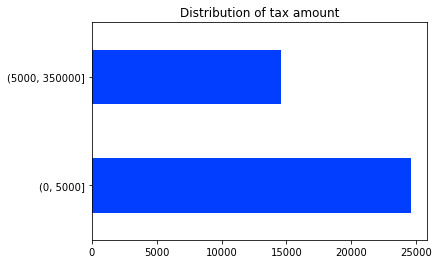

In [112]:
train.tax_amount_bin.value_counts().plot.barh(title = "Distribution of tax amount")

#### Barplot

<AxesSubplot:xlabel='tax_amount_bin', ylabel='logerror'>

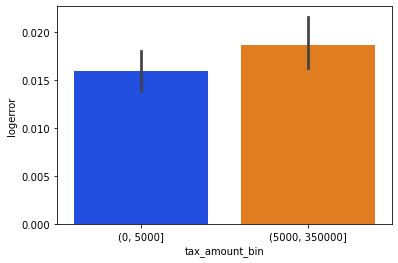

In [113]:
sns.barplot(data=train, y='logerror', x='tax_amount_bin')


### Statistical Testing

#### Testing for Variance 

$H_0$: There is no difference in variance for logerror for properties that pay 5,000 dollars or less in taxes and properties that pay over 5,000 dollars in taxes.

$H_a$: There is a difference in variance for logerror for properties that pay 5,000 dollars or less in taxes and properties that pay over 5,000 dollars in taxes.

In [114]:
stats.levene(
    train[train.taxamount <= 5000].logerror,
    train[train.taxamount > 5000].logerror,
)

LeveneResult(statistic=0.16630477584868666, pvalue=0.6834191991510213)

Because our pvalue is high, we fail to reject the null hypothesis that there is no differece in variance for log error between or two bins.

#### T Test

$H_0$: There is no difference in logerror for properties that pay 5,000 dollars or less in taxes and properties that pay over 5,000 dollars in taxes.

$H_a$: There is a difference in logerror for properties that pay 5,000 dollars or less in taxes and properties that pay over 5,000 dollars in taxes.

In [141]:
stats.ttest_ind(
    train[train.taxamount <= 5000].logerror,
    train[train.taxamount > 5000].logerror,
    equal_var=True
)


Ttest_indResult(statistic=-1.5306433646053854, pvalue=0.12586563299309636)

#### Conclusion

We fail to reject the null hypothesis log error is signficantly different for properties that pay more than 5000 in taxes and properties that pay less than or equal to 5000 in taxes.

## If we control for tax amount, does logerror differ between counties?

### Graph

#### Barplot, groups by taxamount bins

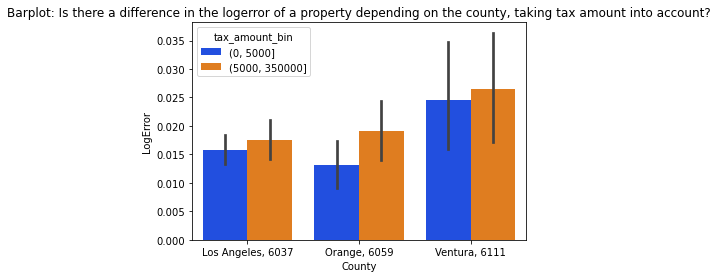

In [134]:
county_log_error = sns.barplot(data = train, y = 'logerror', x = 'fips', hue = 'tax_amount_bin', palette = "bright")
title = plt.title("Barplot: Is there a difference in the logerror of a property depending on the county, taking tax amount into account?")
xlabel = plt.xlabel("County")
ylabel = plt.ylabel("LogError")
xticks = county_log_error.set_xticklabels(["Los Angeles, 6037", "Orange, 6059", "Ventura, 6111"])

### Statistical Testing

In [18]:
low_tax = train[train.taxamount <= 5000]
high_tax = train[train.taxamount > 5000]

#### Testing for Variance

$H_0$: For properties that pay over 5,000 in taxes, there is no difference in variance for logerror for properties in Ventura County and properties in either Los Angeles or Orange County. 

$H_a$: For properties that pay over 5,000 in taxes, there is a difference in variance for logerror for properties in Ventura County and properties in either Los Angeles or Orange County. 

In [46]:
stats.levene(
     high_tax[high_tax.fips == 6111.0].logerror,
    high_tax[high_tax.fips != 6111.0].logerror,
)

LeveneResult(statistic=0.015824977058777084, pvalue=0.8998940621851749)

Because our pvalue is high, we fail to reject the null hypothesis that there is a significant difference in variance of logerror for the two groups.

#### T test

In [144]:
stats.ttest_ind(
    high_tax[high_tax.fips == 6111.0].logerror,
    high_tax[high_tax.fips != 6111.0].logerror,
    equal_var=True
)

Ttest_indResult(statistic=1.622236871941684, pvalue=0.10477426237468493)

Because our pvalue is high, we fail to reject the null hypothesis that there is a difference in logerror for our two groups.

#### Testing for Variance

$H_0$: For properties that pay 5,000 dollars or less in taxes, there is no difference in variance for logerror for properties in Ventura County and properties in either Los Angeles or Orange County. 

$H_a$: For properties that pay 5,000 dollars or less in taxes, there is a difference in variance for logerror for properties in Ventura County and properties in either Los Angeles or Orange County. 

In [47]:
stats.levene(
    low_tax[low_tax.fips == 6111.0].logerror,
    low_tax[low_tax.fips != 6111.0].logerror,
)

LeveneResult(statistic=0.8590400890334017, pvalue=0.35401655106598284)

Because our pvalue is high, we conclude that there is no significant difference in variance for the two groups.

#### T test

$H_0$: For properties that pay 5,000 dollars or less in taxes, there is no difference in logerror for properties in Ventura County and properties in either Los Angeles or Orange County. 

$H_a$: For properties that pay 5,000 dollars or less in taxes, there is a difference in logerror for properties in Ventura County and properties in either Los Angeles or Orange County. 

In [19]:
stats.ttest_ind(
    low_tax[low_tax.fips == 6111.0].logerror,
    low_tax[low_tax.fips != 6111.0].logerror,
    equal_var=True
)

Ttest_indResult(statistic=2.3697816272285097, pvalue=0.01780626674674716)

#### Conclusion

When we control for tax amount, the low tax group still has a significant difference in log error in Orange/Los Angeles vs. Ventura County. The high tax group does not.

## Does Log Error Significantly Differ by Bedroom Count?

### Graphs

#### Barplot

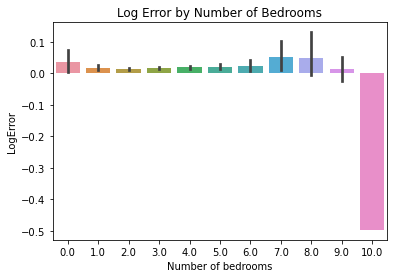

In [22]:
sns.set_palette("bright")
bedroomcnt_logerror = sns.barplot(x = train.bedroomcnt, y = train.logerror)
labels = bedroomcnt_logerror.set(Title = "Log Error by Number of Bedrooms", xlabel = "Number of bedrooms", ylabel="LogError")

#### Value Counts

In [37]:
train.bedroomcnt.value_counts().sort_index()

0.0       175
1.0      1194
2.0      8547
3.0     16556
4.0      9952
5.0      2305
6.0       355
7.0        66
8.0        18
9.0         6
10.0        1
Name: bedroomcnt, dtype: int64

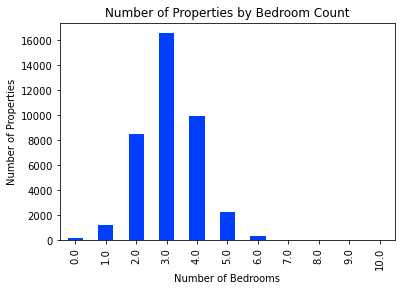

In [36]:
value_counts_barplot = train.bedroomcnt.value_counts().sort_index(ascending = True).plot.bar(title = "Number of Properties by Bedroom Count", xlabel = "Number of Bedrooms", ylabel = "Number of Properties")

### Statistical Testing

#### Testing Variance

$H_0$: There is no significant difference in variance of log error for properties with three or less bedrooms and properties with three or more bedrooms.

$H_a$:  There is a significant difference in variance of log error for properties with three or less bedrooms and properties with three or more bedrooms.

In [39]:
stats.levene(
    train[train.bedroomcnt <= 3.0].logerror,
    train[train.bedroomcnt > 3.0].logerror,
)

LeveneResult(statistic=0.7489259151804459, pvalue=0.38682180531220967)

Because our pvalue is low we fail to reject the null hypothesis and conclude that there is no difference in variance of logerror for the two groups.

#### T Test

$H_0$: There is no significant difference in log error for properties with three or less bedrooms and properties with three or more bedrooms.

$H_a$:  There is a significant difference in log error for properties with three or less bedrooms and properties with three or more bedrooms.

In [19]:
stats.ttest_ind(
    train[train.bedroomcnt <= 3.0].logerror,
    train[train.bedroomcnt > 3.0].logerror,
    equal_var=True
)



Ttest_indResult(statistic=-1.9467335277685935, pvalue=0.0515738278860477)

We fail to reject the null hypothesis, but just barely. 

## Does Log Error Differ by Bathroom Count?

### Graphs

#### Barplot

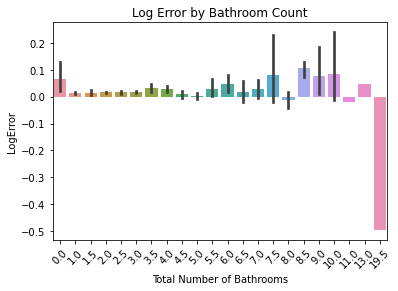

In [41]:
bathroomcnt_logerror = sns.barplot(x = train.bathroomcnt, y = train.logerror)
rotation = plt.xticks(rotation = 45)
labels = bathroomcnt_logerror.set(Title = "Log Error by Bathroom Count", xlabel = "Total Number of Bathrooms", ylabel = "LogError")

#### Value Counts

In [42]:
train.bathroomcnt.value_counts().sort_index()

0.0       112
1.0      7053
1.5       616
2.0     16710
2.5      2983
3.0      8693
3.5       485
4.0      1372
4.5       271
5.0       487
5.5        96
6.0       161
6.5        15
7.0        65
7.5         6
8.0        21
8.5         3
9.0        17
10.0        6
11.0        1
13.0        1
19.5        1
Name: bathroomcnt, dtype: int64

<AxesSubplot:title={'center':'Number of Properies by Bathroom Count'}, xlabel='Number of Bathrooms', ylabel='Number of Properties'>

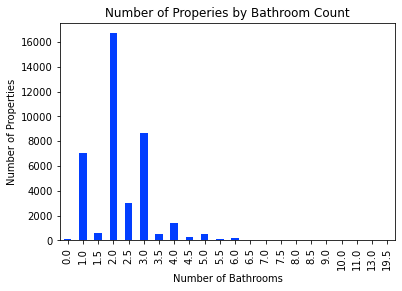

In [45]:
train.bathroomcnt.value_counts().sort_index().plot.bar(title = "Number of Properies by Bathroom Count", xlabel = "Number of Bathrooms", ylabel = "Number of Properties")

### Statistical Testing

#### Testing for Variance

$H_0$: There is no difference in variance of logerror for properties with three of less bathrooms and properties with more than three bathrooms. 

$H_a$: There is a difference in variance of logerror for properties with three of less bathrooms and properties with more than three bathrooms. 

In [48]:
stats.levene(
    train[train.bathroomcnt <= 3.0].logerror,
    train[train.bathroomcnt >3.0].logerror,
)



LeveneResult(statistic=0.7191602721073682, pvalue=0.39642467482098875)

#### T test

$H_0$: There is no difference in logerror for properties with three of less bathrooms and properties with more than three bathrooms. 

$H_a$: There is a difference in logerror for properties with three of less bathrooms and properties with more than three bathrooms. 

In [25]:
stats.ttest_ind(
    train[train.bathroomcnt <= 3.0].logerror,
    train[train.bathroomcnt >3.0].logerror,
    equal_var=True
)




Ttest_indResult(statistic=-2.1467275845759373, pvalue=0.031821096233265074)

There is a significant difference in mean log error for homes with three or less bathrooms and homes with three or more bathrooms.

## Map

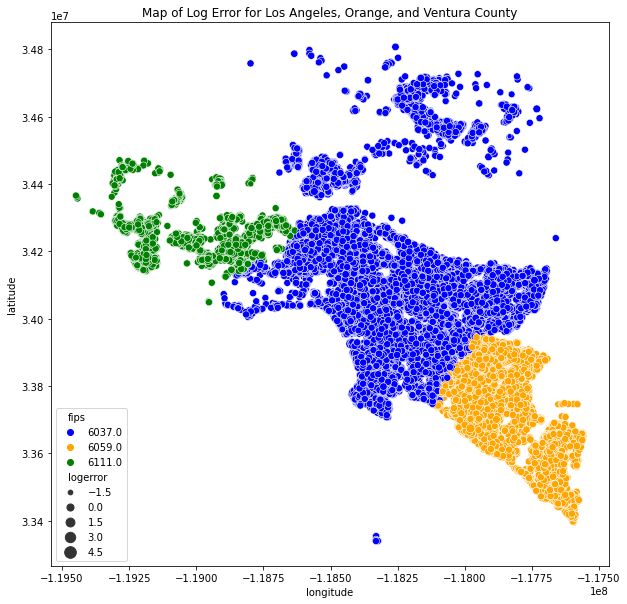

In [40]:
plt.figure(figsize=(10, 10))
county_map = sns.scatterplot(data = train, x = 'longitude', y='latitude', hue = 'fips', palette = ['blue', 'orange', 'green'], size = 'logerror', sizes=(5, 150))
tilte = county_map.set(Title = "Map of Log Error for Los Angeles, Orange, and Ventura County")

## Log Error By ZipCode

In [111]:
overall_log_error = train.logerror.mean()
overall_log_error

0.01697526192285194

In [143]:
log_error = train[["regionidzip", "logerror"]]
log_error

,regionidzip,logerror
2462,96371.0,-0.009313
74293,96346.0,0.109348
47347,96356.0,0.006360
32586,96346.0,0.011047
51749,96208.0,0.021502
...,...,...
29456,96186.0,0.055858
25019,96522.0,-0.017511
25995,97008.0,0.049334
40573,97005.0,0.026122


In [153]:
list_of_zip = log_error['regionidzip'].unique()

In [152]:
for zip_code in list_of_zip:
    t, p = stats.ttest_1samp(
    log_error[log_error['regionidzip'] == zip_code].logerror,
    log_error.logerror.mean(),
    )
    print(zip_code)
    print(t, p)

96371.0
0.7493694290695808 0.4563381215637017
96346.0
0.7856391103015722 0.4331293616184506
96356.0
0.16767381487106928 0.8670093205440904
96208.0
-1.6237748205320974 0.1067916325546246
96236.0
-0.680804946219362 0.4973754031355303
96354.0
-1.1583299530619038 0.24979389424705095
96364.0
-0.2678042675198544 0.7890631344918655
96383.0
-0.7407030531511141 0.4597008961985748
96014.0
-3.2096805499987124 0.004857977943410482
97099.0
-0.0845980598422399 0.9327775676600271
96531.0
1.4004935290560332 0.16380404879134788
96464.0
0.47403202983780146 0.6361398591035627
97118.0
1.3221778172928658 0.18682853821536022
97065.0
-1.4005483823629326 0.1636778625006065
96268.0
-0.6815314058980912 0.4970077722351045
96017.0
-2.251798528738938 0.029894997121659057
96974.0
-0.25875147262938036 0.7960780536556468
96947.0
-0.7817504113935905 0.43634700358205347
96496.0
0.5404267468504619 0.5898346152956644
96492.0
0.27180784935111946 0.786124608833368
96446.0
-2.476309164035164 0.016064612733050612
96961.0
0.9

96280.0
-0.08265537807552487 0.9343270016413301
96246.0
1.2940693573090583 0.20224366743723984
97113.0
-1.4956901290630125 0.1390452764501387
95994.0
1.2648458113292829 0.2240396331092479
96326.0
1.3289775713919056 0.19013832115924933
96505.0
-0.5400869579842497 0.589664198336266
96366.0
-0.5862607179668362 0.5591359839874483
96042.0
-1.2186451249690597 0.22858610420680414
96241.0
-2.3851660790434983 0.01893658132073542
96973.0
0.6868014653437642 0.5009609963427155
96524.0
-0.9171144136110498 0.3610188274933085
96327.0
0.22495438494655495 0.822618512122411
97331.0
1.451823194057476 0.1898503927213635
96320.0
-0.578947907219863 0.5652763436923689
96046.0
0.6153174493111047 0.5399513552798749
97079.0
0.6599080313799867 0.5109615659139131
96238.0
0.2217621481401529 0.825548888653966
97081.0
1.0376323876938298 0.3017376280205572
96181.0
0.5112810575794602 0.6108605272480232
96150.0
1.2371108953588505 0.2211184599489659
97040.0
-0.6157148808391399 0.540820931646208
97098.0
0.602286890950715

In [160]:
for zip_code in list_of_zip:
    t, p = stats.ttest_1samp(
    log_error[log_error['regionidzip'] == zip_code].logerror,
    log_error.logerror.mean(),
    )
    if p < 0.025:
        print(zip_code, ",")

96014.0 ,
96446.0 ,
96465.0 ,
96375.0 ,
96510.0 ,
96026.0 ,
96107.0 ,
97023.0 ,
96336.0 ,
96180.0 ,
96490.0 ,
96241.0 ,
95996.0 ,
96048.0 ,
96009.0 ,


In [161]:
zip_codes_log_error = [96014.0 ,
96446.0 ,
96465.0 ,
96375.0 ,
96510.0 ,
96026.0 ,
96107.0 ,
97023.0 ,
96336.0 ,
96180.0 ,
96490.0 ,
96241.0 ,
95996.0 ,
96048.0 ,
96009.0  ]